<a href="https://colab.research.google.com/github/STT-DMatrix/Market-analysis-/blob/main/GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Volatility with GARCH

## 2. Install & Import Packages

In [ ]:
!pip install yfinance
!pip install pandas-datareader

# Import yfinance to make Yahoo Finance API call
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
from datetime import datetime
from functools import reduce

# Import data reader to directly convert Yahoo Finance data into dataframe
from pandas_datareader import data as pdr

!pip install arch
from arch import arch_model

# ACF plot of standardized residuals
from statsmodels.graphics.tsaplots import plot_acf

# Ljunb-Box test of standardized residuals
from statsmodels.stats.diagnostic import acorr_ljungbox

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set seaborn plot style
sns.set_style("darkgrid")

# Set matplotlib plot style
style.use("fivethirtyeight")

## 3. Collect data



In [1]:
from google.colab import files
uploaded = files.upload()

Saving crypto_energy_analysis.xlsx to crypto_energy_analysis.xlsx


In [2]:
import pandas as pd

# Load log returns directly from Sheet 4 of the uploaded Excel file
log_returns = pd.read_excel("crypto_energy_analysis.xlsx", sheet_name="Sheet4_LogReturns", parse_dates=['date'])

# Set 'date' as index
log_returns.set_index('date', inplace=True)

# Display the first few rows to confirm
log_returns.head()


,index,BTC,ETH,LTC,ADA,DOT,SOL,CL.1,CO1:COM,NG1,QCLN,CELS,XAU,Gold_Close,Brent_Close,WTI_Close,EU_NG_Close,US_NG_Close,CELS_Close,QCLN_Close
date,,,,,,,,,,,,,,,,,,,,
2020-08-21,1.0,0.015587,0.047697,0.046398,0.005638,0.470569,0.127799,0.006591,0.017435,0.026206,0.016325,0.013612,-0.005996,0.013537,0.017435,0.006591,0.083276,0.026206,0.013612,0.016325
2020-08-24,2.0,-0.035306,-0.060968,-0.059962,-0.094267,0.182372,-0.024268,0.016983,0.016046,-0.009596,0.020399,0.021139,-0.000363,-0.012832,0.016046,0.016983,0.074627,-0.009596,0.021139,0.020399
2020-08-25,3.0,0.010696,0.006412,-0.003763,0.017498,0.096291,0.086113,0.000922,-0.004809,-0.011313,0.019520,0.020629,0.013537,0.018124,-0.004809,0.000922,0.041271,-0.011313,0.020629,0.019520
2020-08-26,4.0,-0.014463,-0.009986,-0.040565,-0.076580,-0.077477,-0.032358,-0.008099,-0.012124,0.046834,-0.002360,0.000597,-0.012832,0.001510,-0.012124,-0.008099,-0.030098,0.046834,0.000597,-0.002360
2020-08-27,5.0,0.019164,0.034017,0.023107,0.024967,0.090269,0.152187,-0.001628,-0.000888,0.029796,0.008939,0.007849,0.018124,0.001209,-0.000888,-0.001628,0.090247,0.029796,0.007849,0.008939


In [4]:
!pip install arch
from arch import arch_model

# Choose some cryptos and energy assets
selected_assets = ['BTC', 'ETH', 'ADA', 'CL.1', 'NG1']
garch_volatility = {}

# Fit GARCH(1,1) to each
for asset in selected_assets:
    print(f"Fitting GARCH model for {asset}...")
    series = log_returns[asset].dropna() * 100  # convert to percent scale
    model = arch_model(series, vol='Garch', p=1, q=1)
    result = model.fit(disp='off')
    garch_volatility[asset] = result.conditional_volatility

# Create a DataFrame
garch_vol_df = pd.DataFrame(garch_volatility)
garch_vol_df.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 16.0 MB/s eta 0:00:00
Fitting GARCH model for BTC...
Fitting GARCH model for ETH...
Fitting GARCH model for ADA...
Fitting GARCH model for CL.1...
Fitting GARCH model for NG1...


,BTC,ETH,ADA,CL.1,NG1
date,,,,,
2020-08-21,3.236039,6.035800,7.069135,2.603199,4.846384
2020-08-24,3.173698,5.918251,6.663239,2.468638,4.721936
2020-08-25,3.258159,5.940666,7.016823,2.394589,4.567705
2020-08-26,3.181184,5.674655,6.639620,2.271942,4.424033
2020-08-27,3.134978,5.434762,6.756652,2.179666,4.443497


from matplotlib import pyplot as plt
_df_0['BTC'].plot(kind='hist', bins=20, title='BTC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ETH'].plot(kind='hist', bins=20, title='ETH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ADA'].plot(kind='hist', bins=20, title='ADA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['CL.1'].plot(kind='hist', bins=20, title='CL.1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='BTC', y='ETH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ETH', y='ADA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='ADA', y='CL.1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='CL.1', y='NG1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['BTC'].plot(kind='line', figsize=(8, 4), title='BTC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['ETH'].plot(kind='line', figsize=(8, 4), title='ETH')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['ADA'].plot(kind='line', figsize=(8, 4), title='ADA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['CL.1'].plot(kind='line', figsize=(8, 4), title='CL.1')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
garch_vol_df.to_excel("garch_volatility_output.xlsx")
from google.colab import files
files.download("garch_volatility_output.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

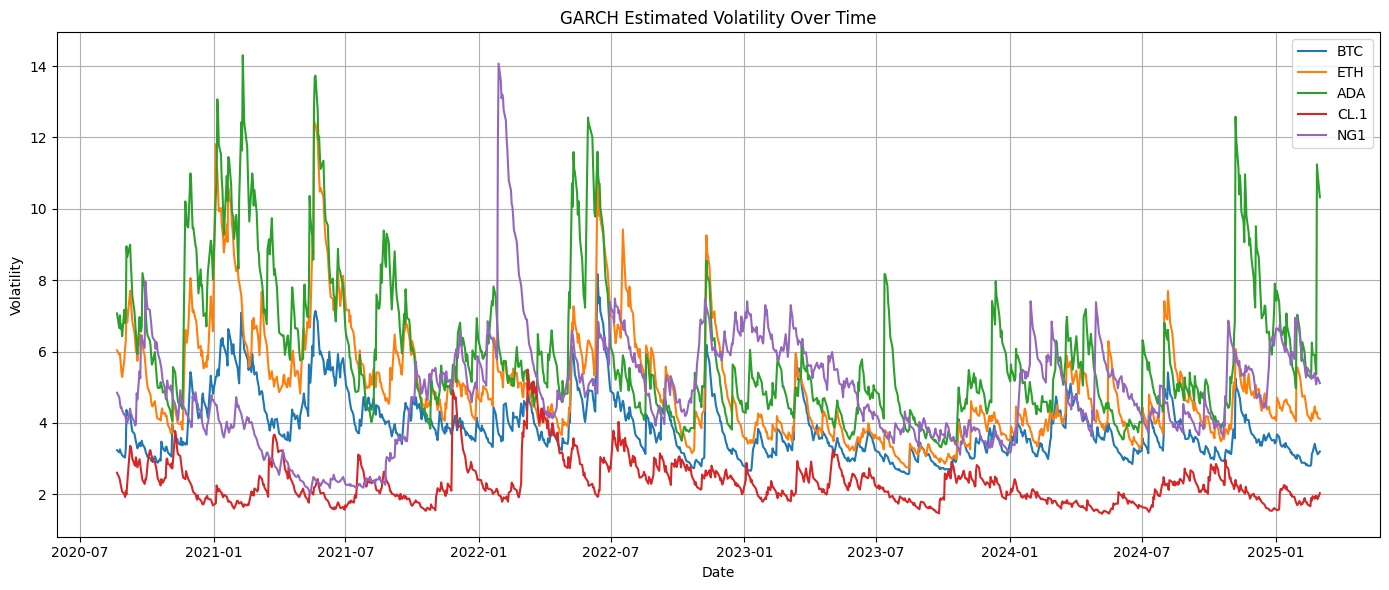

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
for asset in garch_vol_df.columns:
    plt.plot(garch_vol_df.index, garch_vol_df[asset], label=asset)
plt.title("GARCH Estimated Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


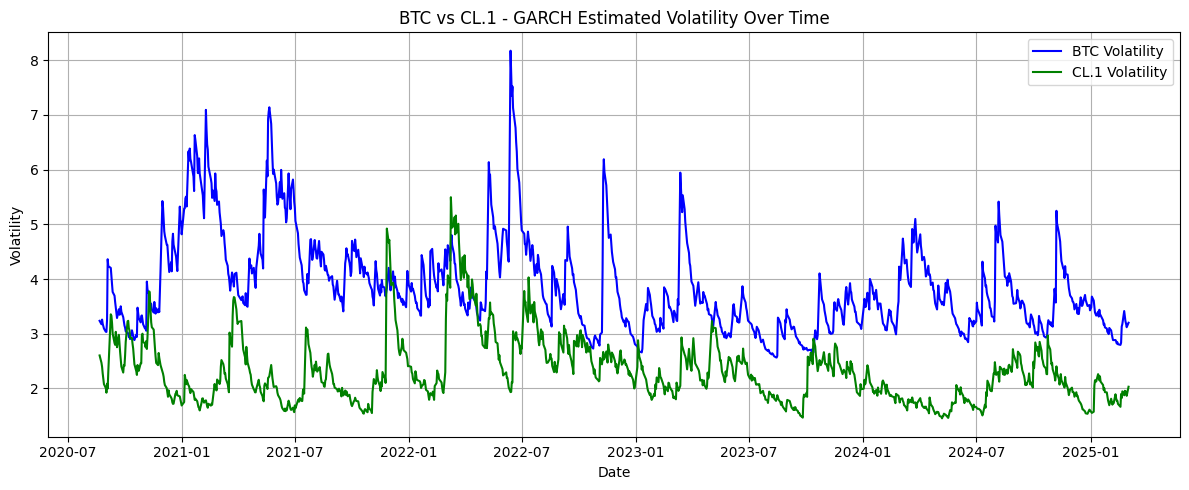

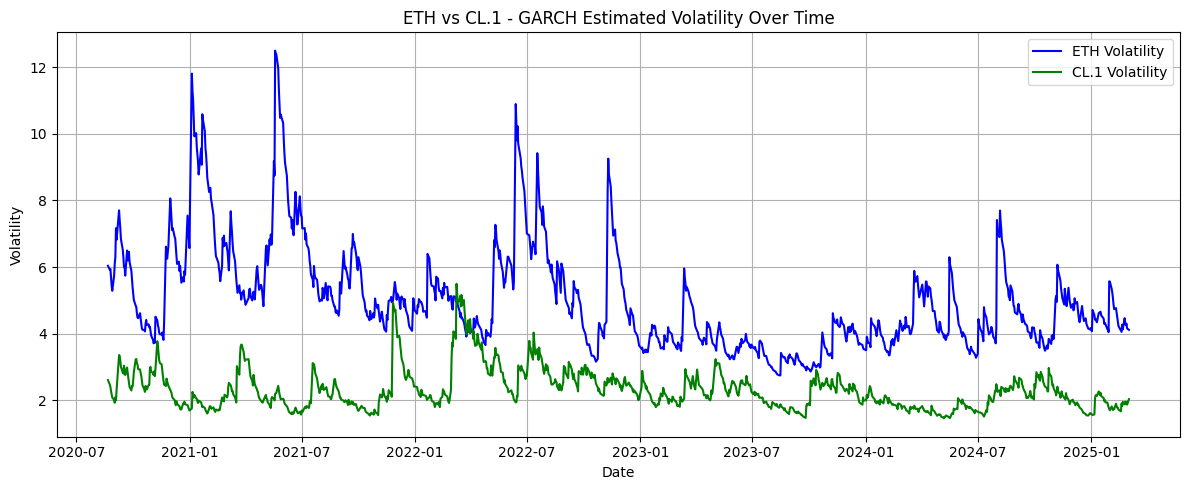

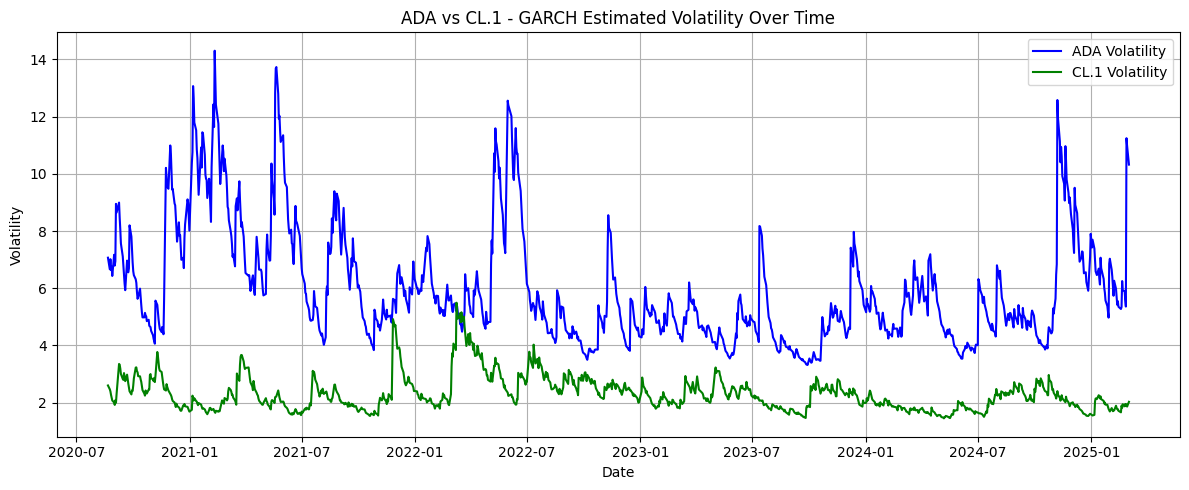

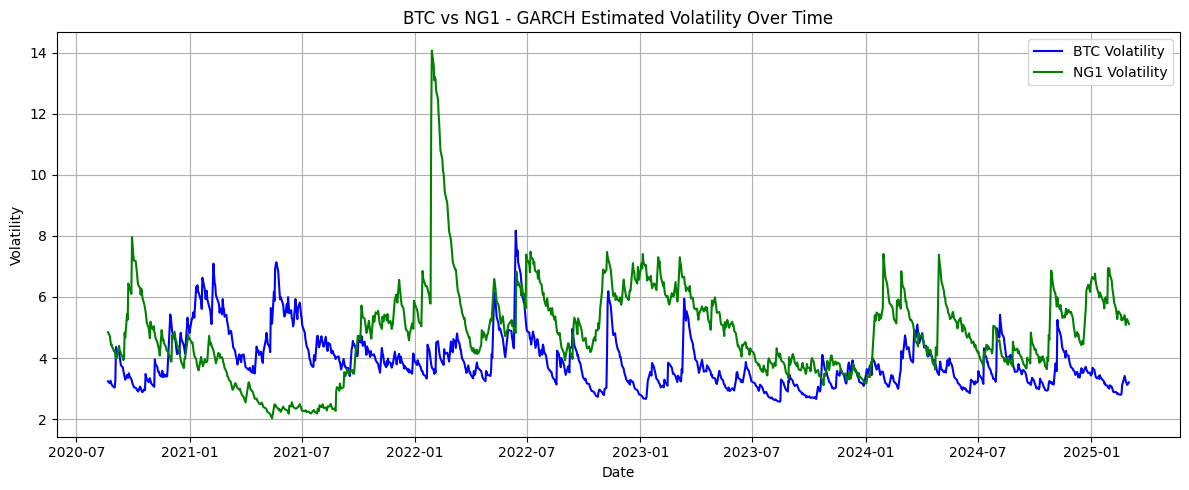

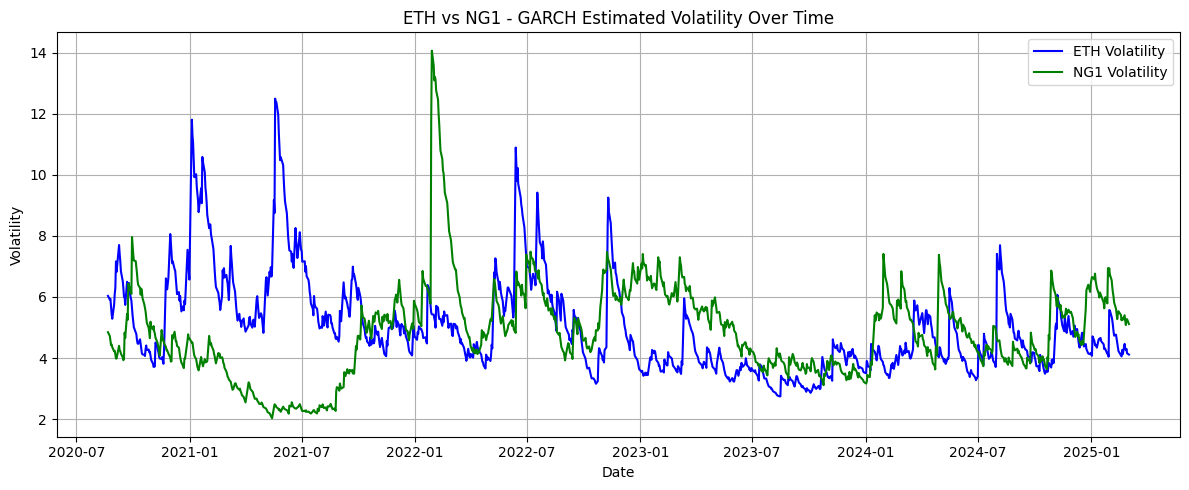

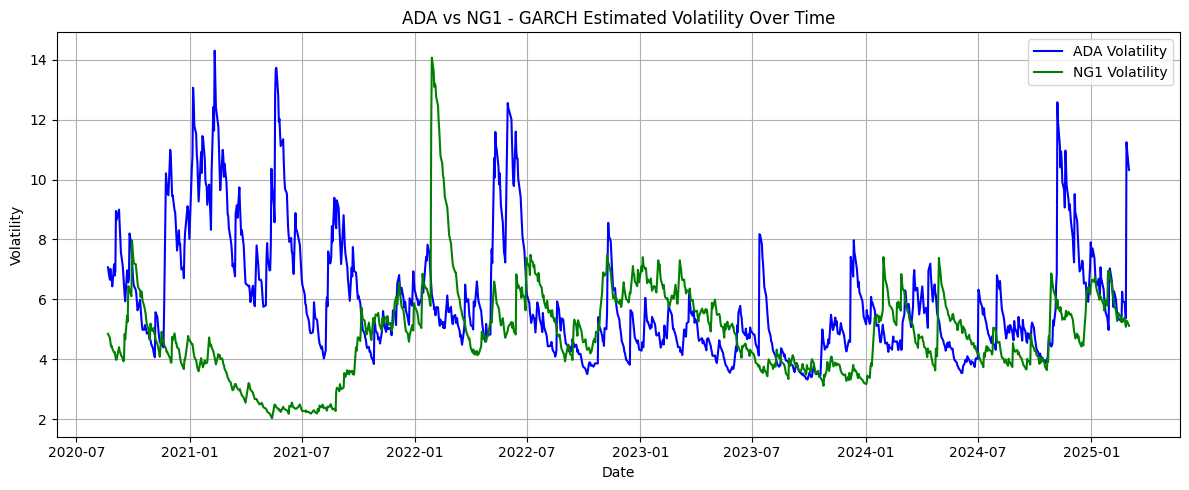

In [13]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Define crypto-energy pairs to plot
pairs_to_plot = [
    ('BTC', 'CL.1'),      # Bitcoin - Crude Oil
    ('ETH', 'CL.1'),      # Ethereum - Crude Oil
    ('ADA', 'CL.1'),      # Cardano - Crude Oil
    ('BTC', 'NG1'),       # Bitcoin - Natural Gas
    ('ETH', 'NG1'),       # Ethereum - Natural Gas
    ('ADA', 'NG1'),       # Cardano - Natural Gas
]

# Create and save PDF
pdf_path = "crypto_energy_volatility_pairs.pdf"
with PdfPages(pdf_path) as pdf:
    for crypto, energy in pairs_to_plot:
        plt.figure(figsize=(12, 5))
        plt.plot(garch_vol_df.index, garch_vol_df[crypto], label=f'{crypto} Volatility', color='blue')
        plt.plot(garch_vol_df.index, garch_vol_df[energy], label=f'{energy} Volatility', color='green')
        plt.title(f'{crypto} vs {energy} - GARCH Estimated Volatility Over Time')
        plt.xlabel('Date')
        plt.ylabel('Volatility')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        pdf.savefig()
        plt.show()
        plt.close()




In [14]:
# 📦 Install necessary packages
!pip install copulas scikit-learn

# 📁 Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from copulas.bivariate import GaussianCopula

# 🧠 Select your pairs
pairs = [
    ('BTC', 'CL.1'),   # Bitcoin - Crude Oil
    ('ETH', 'CL.1'),   # Ethereum - Crude Oil
    ('ADA', 'NG1'),    # Cardano - Natural Gas
]

# 📊 Loop through each pair and fit + visualize copula
for crypto, energy in pairs:
    print(f"\n📈 Analyzing Copula for {crypto} vs {energy}")

    # Step 1: Extract and align log returns
    x = log_returns[crypto].dropna().values.reshape(-1, 1)
    y = log_returns[energy].dropna().values.reshape(-1, 1)

    min_len = min(len(x), len(y))
    x = x[-min_len:]
    y = y[-min_len:]
    data = np.hstack([x, y])

    # Step 2: Transform to uniform marginals
    qt = QuantileTransformer(output_distribution='uniform')
    data_uniform = qt.fit_transform(data)

    # Step 3: Fit Gaussian copula
    copula = GaussianCopula()
    copula.fit(data_uniform)

    # Step 4: Generate synthetic samples
    samples = copula.sample(1000)

    # Step 5: Plot real vs simulated dependency
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(data_uniform[:, 0], data_uniform[:, 1], alpha=0.5)
    plt.title(f"Empirical Copula: {crypto} vs {energy}")
    plt.xlabel(crypto)
    plt.ylabel(energy)
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, color='orange')
    plt.title(f"Gaussian Copula Samples: {crypto} vs {energy}")
    plt.xlabel(crypto)
    plt.ylabel(energy)
    plt.grid(True)

    plt.tight_layout()
    plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.0 MB/s eta 0:00:00


ImportError: cannot import name 'GaussianCopula' from 'copulas.bivariate' (/usr/local/lib/python3.11/dist-packages/copulas/bivariate/__init__.py)

In [18]:
from copulas.multivariate import GaussianMultivariate
from sklearn.preprocessing import QuantileTransformer
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the crypto-energy pairs you want to model
pairs = [
    ('BTC', 'CL.1'),
    ('ETH', 'CL.1'),
    ('ADA', 'NG1')
]

# Create PDF
pdf_path = "copula_dependency_plots.pdf"
with PdfPages(pdf_path) as pdf:
    for crypto, energy in pairs:
        print(f"Plotting copula: {crypto} vs {energy}")

        x = log_returns[crypto].dropna().values.reshape(-1, 1)
        y = log_returns[energy].dropna().values.reshape(-1, 1)

        min_len = min(len(x), len(y))
        x = x[-min_len:]
        y = y[-min_len:]

        data = pd.DataFrame(np.hstack([x, y]), columns=[crypto, energy])

        # Fit Gaussian copula
        copula = GaussianMultivariate()
        copula.fit(data)
        samples = copula.sample(1000)

        # Plot both real and simulated dependencies
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        plt.scatter(data[crypto], data[energy], alpha=0.5)
        plt.title(f"Empirical: {crypto} vs {energy}")
        plt.xlabel(crypto)
        plt.ylabel(energy)
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.scatter(samples[crypto], samples[energy], alpha=0.5, color='orange')
        plt.title("Simulated via Gaussian Copula")
        plt.xlabel(crypto)
        plt.ylabel(energy)
        plt.grid(True)

        plt.suptitle(f"{crypto} vs {energy} - Gaussian Copula Dependency", fontsize=14)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

# Download the generated PDF
from google.colab import files
files.download(pdf_path)


Plotting copula: BTC vs CL.1


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


Plotting copula: ETH vs CL.1


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


Plotting copula: ADA vs NG1


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🔍 Analyzing BTC vs CL.1 (PoW)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))



🔍 Analyzing ETH vs CL.1 (PoW)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))



🔍 Analyzing ADA vs NG1 (PoS)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))



🔍 Analyzing DOT vs NG1 (PoS)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))



🔍 Analyzing SOL vs CL.1 (PoS)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))



📈 Summary Table:

  Crypto Energy Type  Kendall's Tau  Pearson Corr  Clayton θ  Gumbel θ
0    BTC   CL.1  PoW         0.0244        0.0299     0.0501    1.0250
1    ETH   CL.1  PoW         0.0221        0.0477     0.0452    1.0226
2    ADA    NG1  PoS         0.0136        0.0272     0.0276    1.0138
3    DOT    NG1  PoS         0.0185        0.0327     0.0376    1.0188
4    SOL   CL.1  PoS         0.0225        0.0460     0.0460    1.0230


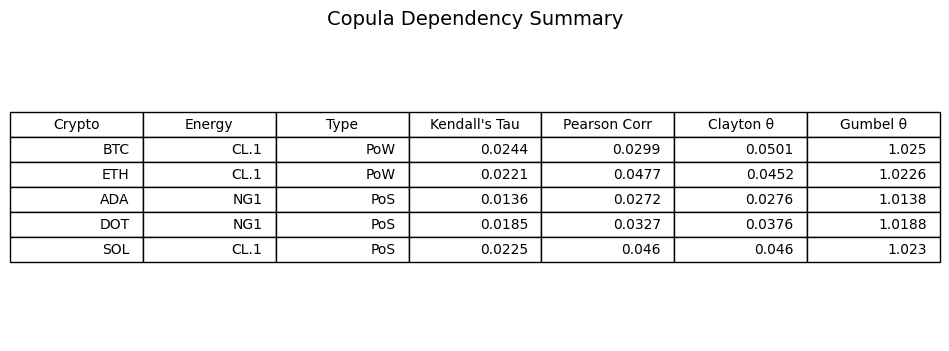

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# 📦 Install dependencies
!pip install copulas scikit-learn

# 📁 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copulas.bivariate import Clayton, Gumbel
from copulas.multivariate import GaussianMultivariate
from scipy.stats import kendalltau, pearsonr
from matplotlib.backends.backend_pdf import PdfPages

# ✅ Define your crypto-energy pairs
pairs = [
    ('BTC', 'CL.1', 'PoW'),
    ('ETH', 'CL.1', 'PoW'),
    ('ADA', 'NG1', 'PoS'),
    ('DOT', 'NG1', 'PoS'),
    ('SOL', 'CL.1', 'PoS')
]

# 🗂️ Store results here
results = []
pdf_path = "copula_dependency_line_plots.pdf"

with PdfPages(pdf_path) as pdf:
    for crypto, energy, crypto_type in pairs:
        print(f"\n🔍 Analyzing {crypto} vs {energy} ({crypto_type})")

        # Step 1: Align and extract data
        x = log_returns[crypto].dropna()
        y = log_returns[energy].dropna()
        min_len = min(len(x), len(y))
        x = x[-min_len:]
        y = y[-min_len:]
        df = pd.DataFrame({crypto: x.values, energy: y.values})

        # Normalize to [0,1] using rank method
        u = df[crypto].rank(method='average') / len(df)
        v = df[energy].rank(method='average') / len(df)
        uniform_data = np.vstack([u, v]).T

        # Step 2: Fit Copulas
        cop_gauss = GaussianMultivariate()
        cop_gauss.fit(df)

        cop_clay = Clayton()
        cop_clay.fit(uniform_data)

        cop_gumb = Gumbel()
        cop_gumb.fit(uniform_data)

        # Step 3: Generate Samples
        sim_gauss = cop_gauss.sample(1000)
        sim_clay = cop_clay.sample(1000)
        sim_gumb = cop_gumb.sample(1000)

        # Step 4: Dependency Metrics
        tau, _ = kendalltau(x, y)
        pearson, _ = pearsonr(x, y)

        results.append({
            'Crypto': crypto,
            'Energy': energy,
            'Type': crypto_type,
            "Kendall's Tau": round(tau, 4),
            "Pearson Corr": round(pearson, 4),
            "Clayton θ": round(cop_clay.theta, 4),
            "Gumbel θ": round(cop_gumb.theta, 4)
        })

        # Step 5: Plotting (LINE PLOTS instead of scatter)
        fig, axs = plt.subplots(2, 2, figsize=(14, 10))

        # Line plot: Empirical
        axs[0, 0].plot(u.values, label=f'{crypto} (u)', linewidth=1.5)
        axs[0, 0].plot(v.values, label=f'{energy} (v)', linewidth=1.5)
        axs[0, 0].set_title(f"Empirical Ranks: {crypto} vs {energy}")
        axs[0, 0].legend()
        axs[0, 0].grid(True)

        # Line plot: Gaussian Copula Simulation
        axs[0, 1].plot(sim_gauss[crypto].sort_values().values, label=f'{crypto} Sim', linewidth=1.5)
        axs[0, 1].plot(sim_gauss[energy].sort_values().values, label=f'{energy} Sim', linewidth=1.5)
        axs[0, 1].set_title("Gaussian Copula Simulation")
        axs[0, 1].legend()
        axs[0, 1].grid(True)

        # Line plot: Clayton Copula
        axs[1, 0].plot(np.sort(sim_clay[:, 0]), label=f'{crypto} Sim', linewidth=1.5)
        axs[1, 0].plot(np.sort(sim_clay[:, 1]), label=f'{energy} Sim', linewidth=1.5)
        axs[1, 0].set_title("Clayton Copula Simulation")
        axs[1, 0].legend()
        axs[1, 0].grid(True)

        # Line plot: Gumbel Copula
        axs[1, 1].plot(np.sort(sim_gumb[:, 0]), label=f'{crypto} Sim', linewidth=1.5)
        axs[1, 1].plot(np.sort(sim_gumb[:, 1]), label=f'{energy} Sim', linewidth=1.5)
        axs[1, 1].set_title("Gumbel Copula Simulation")
        axs[1, 1].legend()
        axs[1, 1].grid(True)

        plt.suptitle(f"{crypto} vs {energy} ({crypto_type}) - Copula Comparison (Line Graph)", fontsize=14)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

# 📊 Create Summary Table
result_df = pd.DataFrame(results)
print("\n📈 Summary Table:\n")
print(result_df)

# 📄 Save Summary Table into PDF
fig, ax = plt.subplots(figsize=(10, len(result_df)*0.6 + 1))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=result_df.values, colLabels=result_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
plt.title("Copula Dependency Summary", fontsize=14)
pdf.savefig(fig)
plt.show()

# 📥 Download the PDF
from google.colab import files
files.download(pdf_path)
